Clustering and regression exercise
- Data from oil reservoir
    - Load numpy arrays with P-velocity and Porosity

    - Do data normalization

    - Cluster data Vp-porosity

    - Extract clusters

    - Perform regression

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [110]:
Vp = np.load('vp.npy')
poro = np.load('porosity.npy')

feature_vectors = pd.DataFrame(data={'poro': poro, 'Vp': Vp})
feature_vectors

,poro,Vp
0,0.0388,3.627783
1,0.0812,3.274807
2,0.2513,2.577231
3,0.1015,3.099823
4,0.0529,3.523676
...,...,...
74966,0.0496,3.537857
74967,0.1002,3.130548
74968,0.0859,3.273773
74969,0.1195,2.994949


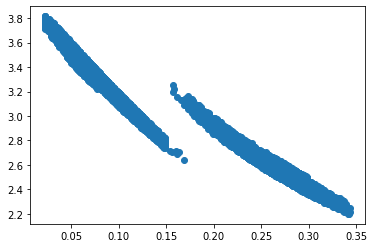

In [111]:
plt.scatter(poro, Vp)

Normalization

In [112]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_feature_vectors = scaler.transform(feature_vectors)

74971

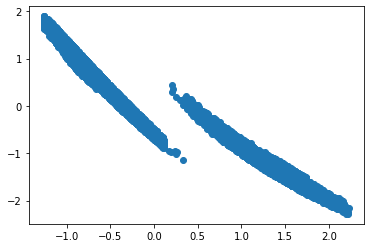

In [113]:
plt.scatter(scaled_feature_vectors[:,0], scaled_feature_vectors[:,1])
len(scaled_feature_vectors[:,1])

Clustering

2


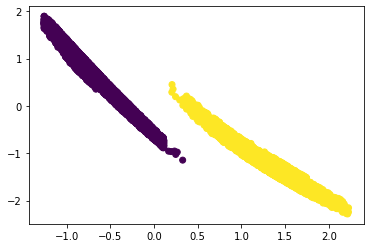

In [114]:
# DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.25, min_samples=10).fit(scaled_feature_vectors)
labels_DBSCAN = db.labels_

no_clusters = len(np.unique(labels_DBSCAN) )
no_noise = np.sum(np.array(labels_DBSCAN) == -1, axis=0)
print(no_clusters)

plt.scatter(scaled_feature_vectors[:,0], scaled_feature_vectors[:,1], c=labels_DBSCAN)

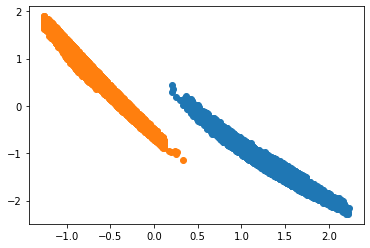

In [115]:
# Gaussian Mixture
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(scaled_feature_vectors)
gm.means_
labels_data = gm.predict(scaled_feature_vectors)
mask_0 = labels_data == 0
mask_1 = labels_data == 1

plt.scatter(scaled_feature_vectors[mask_0, 0], scaled_feature_vectors[mask_0, 1])
plt.scatter(scaled_feature_vectors[mask_1, 0], scaled_feature_vectors[mask_1, 1])

In [116]:
def regression_scikit(x_train, y_train, x_test, degree):
    X_train=x_train[:, np.newaxis]
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())  # model class
    model.fit(X_train, y_train)
    X_test=x_test[:, np.newaxis]
    y_pred= model.predict(X_test)
    return y_pred, model

Regression

In [123]:
mask_0 = labels_DBSCAN == 0
mask_1 = labels_DBSCAN == 1

class_0_features = feature_vectors[mask_0]
class_1_features = feature_vectors[mask_1]

In [124]:
class_0_features

,poro,Vp
0,0.0388,3.627783
1,0.0812,3.274807
3,0.1015,3.099823
4,0.0529,3.523676
5,0.0597,3.435630
...,...,...
74966,0.0496,3.537857
74967,0.1002,3.130548
74968,0.0859,3.273773
74969,0.1195,2.994949


In [148]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(class_0_features['poro']), np.array(class_0_features['Vp']), test_size=0.2, random_state=42)

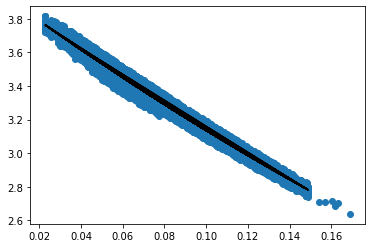

In [152]:
norder = 2
y_sci, model=regression_scikit(X_train, y_train, X_test,norder)
model.score(X_train[:, np.newaxis],y_train)

plt.plot(X_test, y_sci, color='k')
plt.scatter(X_train, y_train)
